In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

import itertools
import math

%matplotlib inline

# pd.set_option("display.max_rows", 10)

np.random.seed(2)

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.wrappers.scikit_learn import KerasRegressor


In [72]:
# Load the data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

train.shape

(1460, 81)

In [73]:
train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [74]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [75]:
# fill missing text fields with a default string
object_columns = train.select_dtypes(include=[object])
object_columns.fillna('NoData', inplace=True)


In [76]:
int_columns = train.select_dtypes(include=[int, float])
int_columns.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [77]:
int_columns['LotFrontage'].fillna(int_columns['LotFrontage'].mean(), inplace=True)

int_columns['GarageYrBlt'].fillna(int_columns['GarageYrBlt'].mean(), inplace=True)
int_columns.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [78]:
train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

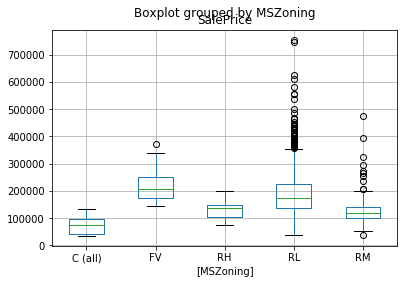

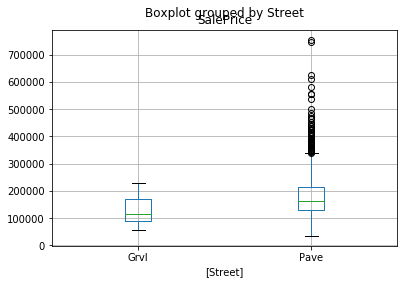

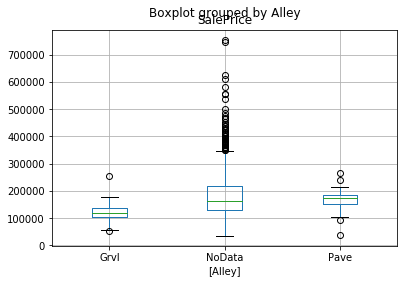

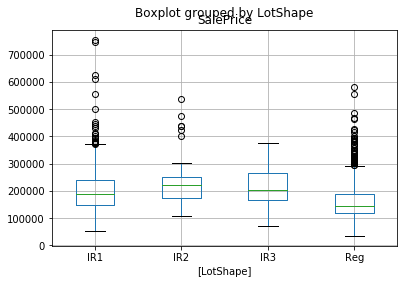

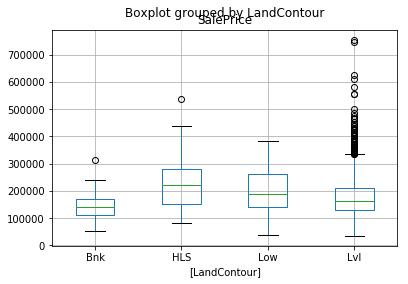

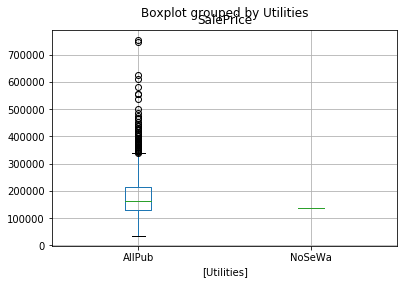

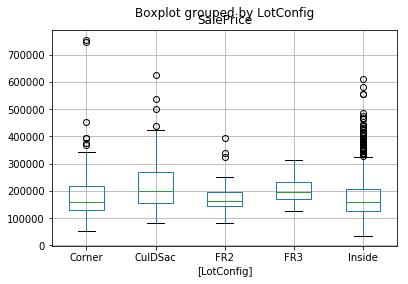

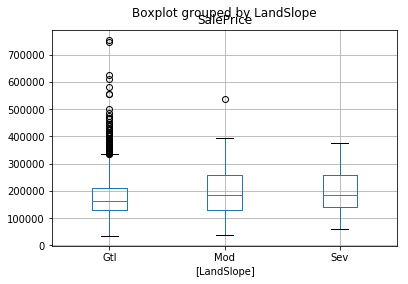

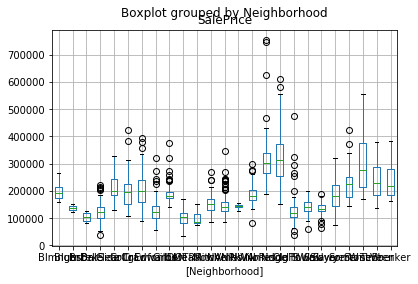

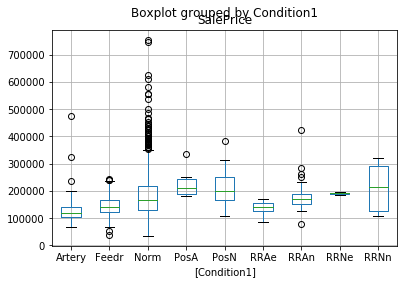

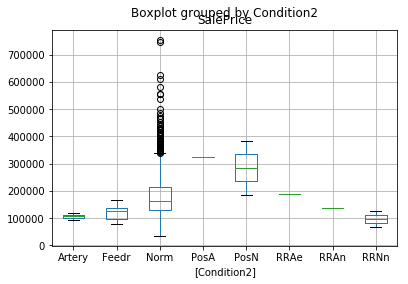

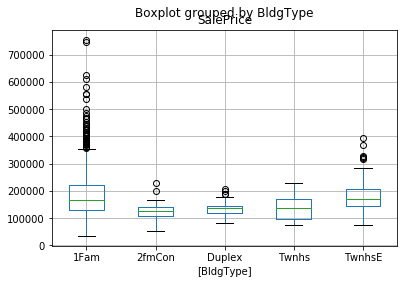

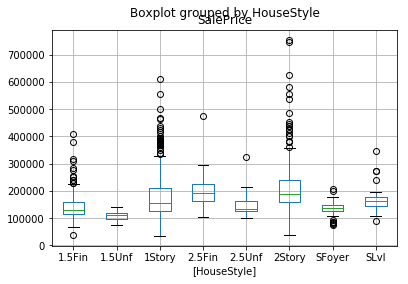

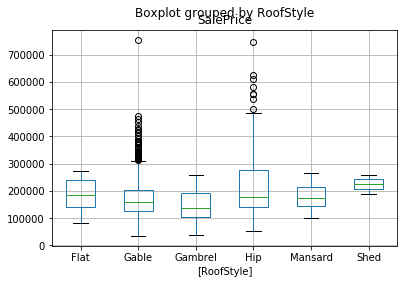

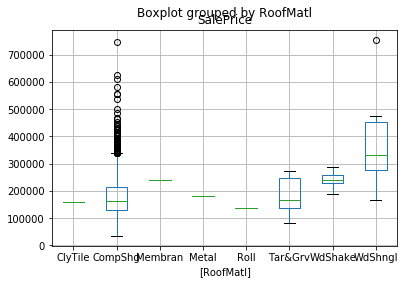

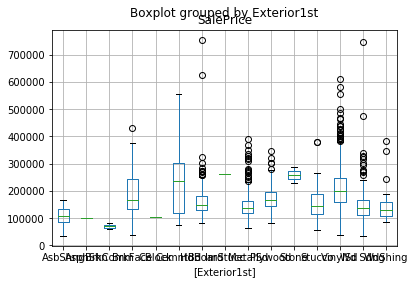

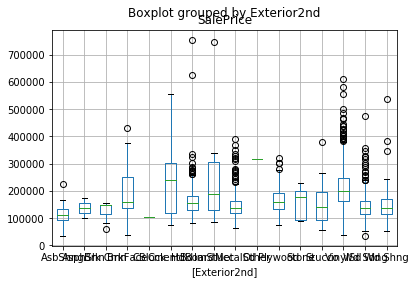

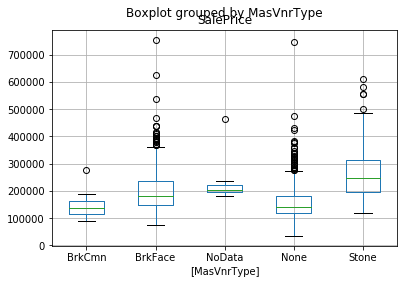

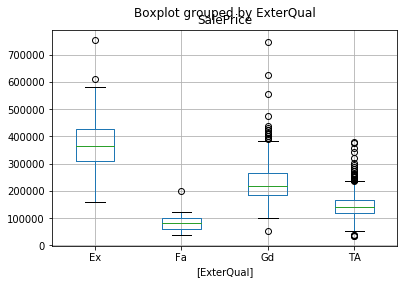

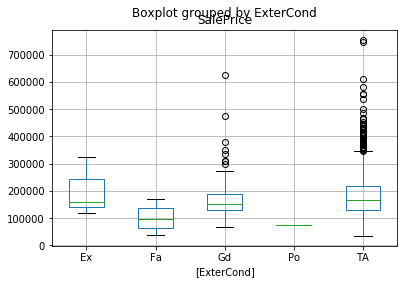

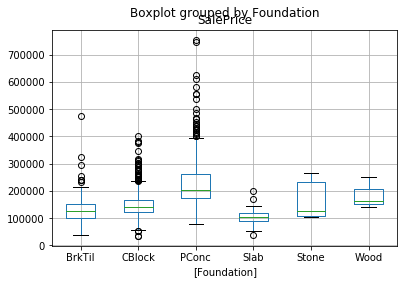

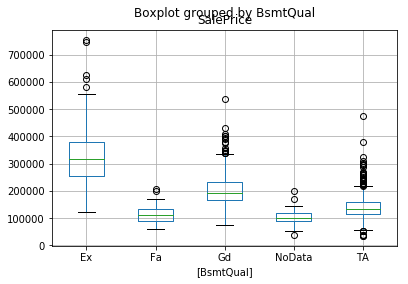

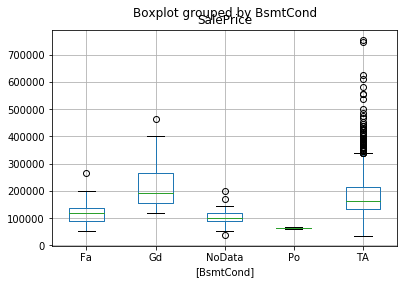

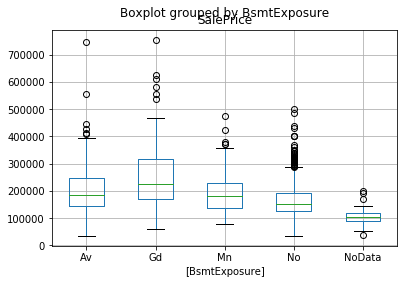

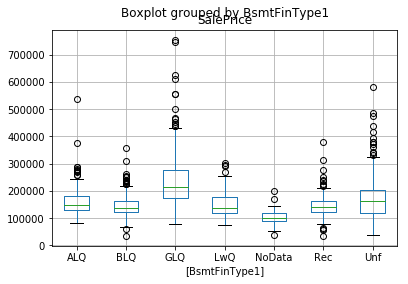

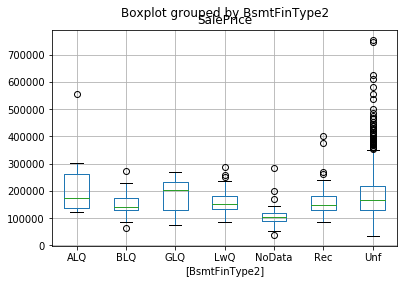

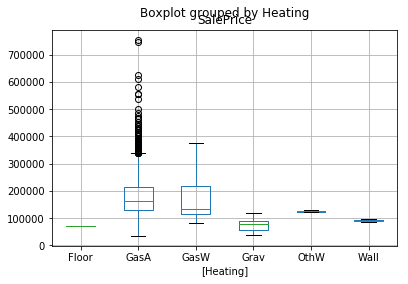

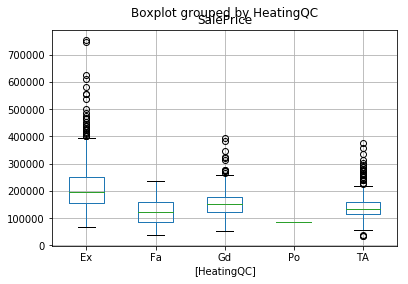

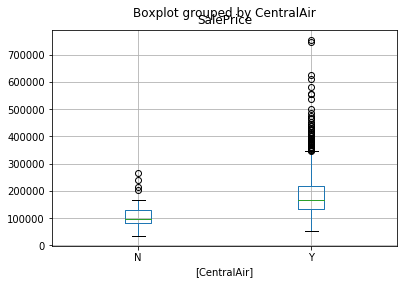

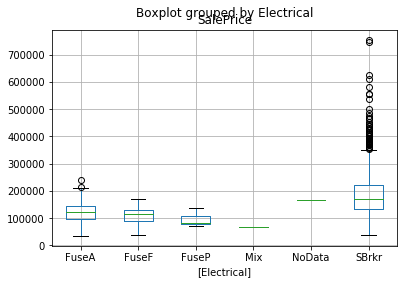

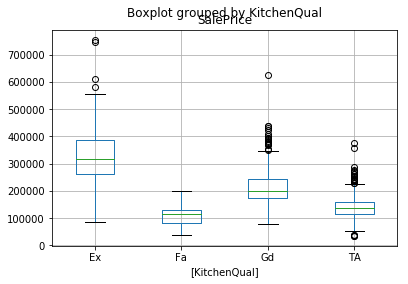

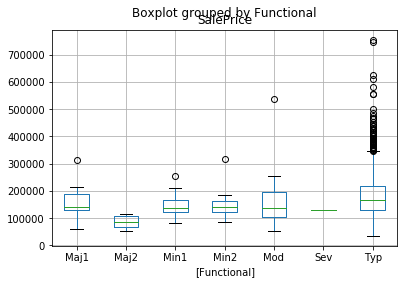

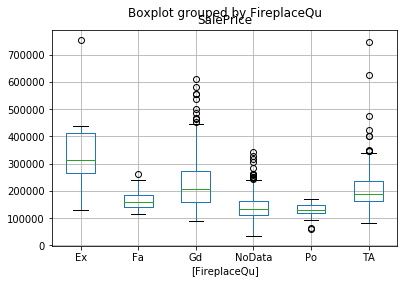

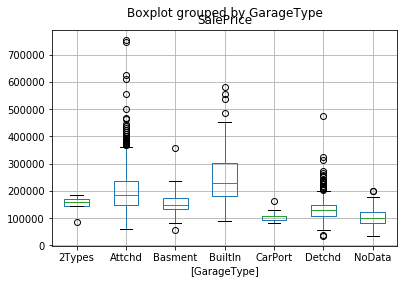

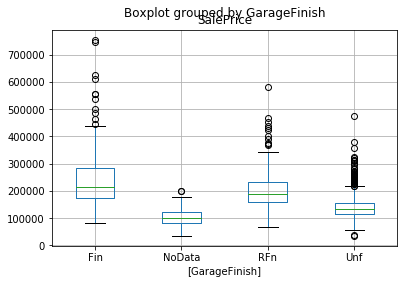

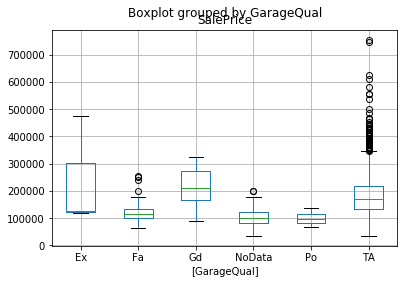

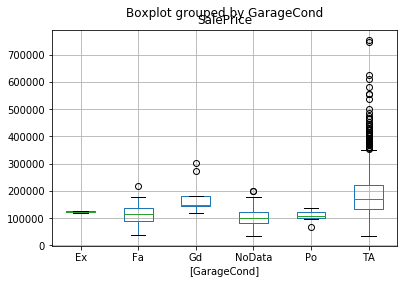

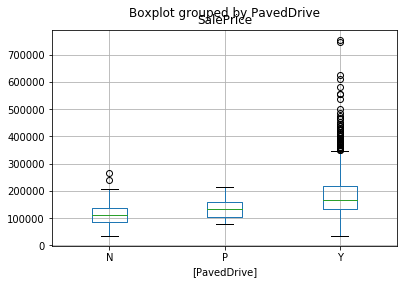

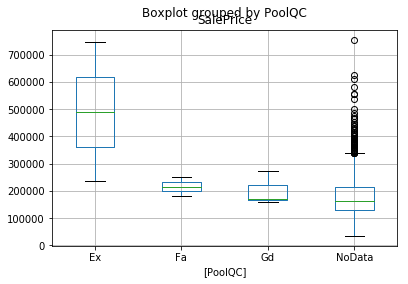

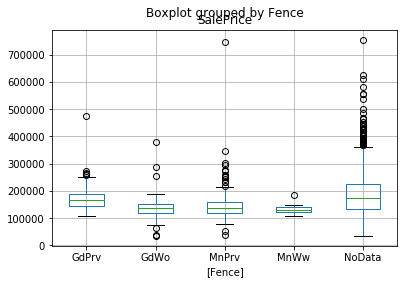

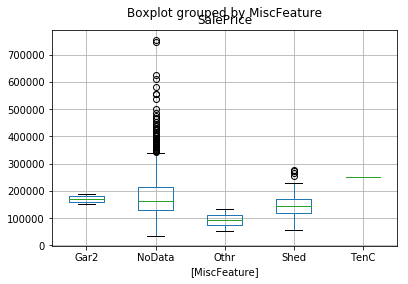

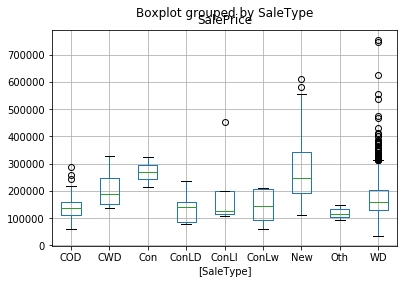

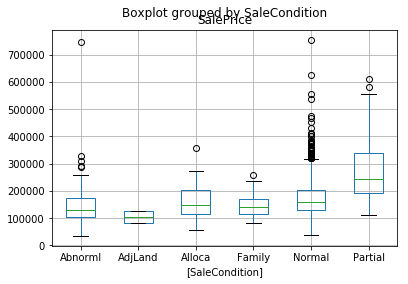

In [79]:
object_columns.loc[:,'SalePrice'] = train.loc[:,'SalePrice']
for c in object_columns.columns:
    if c != 'SalePrice':
        object_columns.boxplot(column=['SalePrice'], by=[c])

object_columns.drop('SalePrice', axis=1, inplace=True)



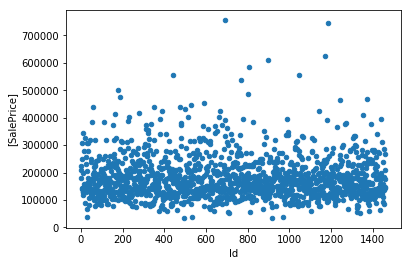

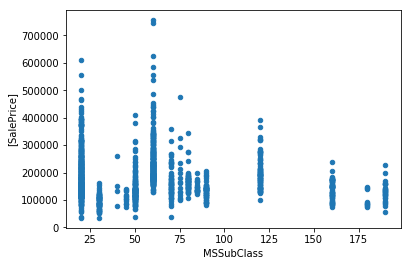

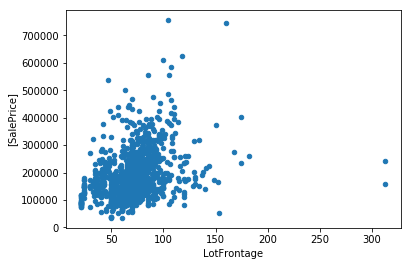

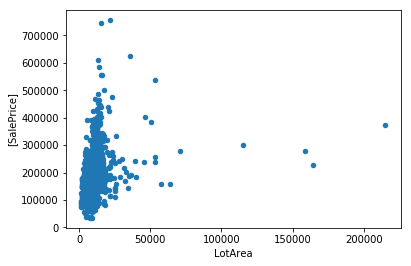

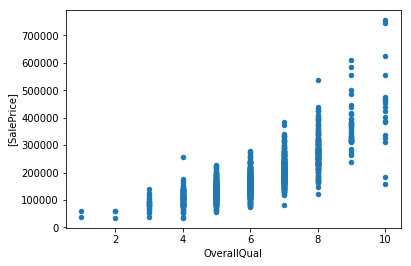

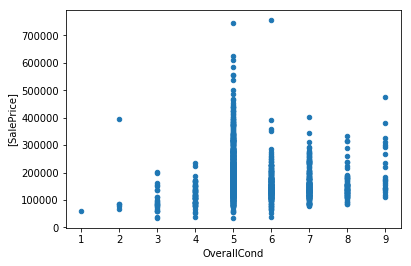

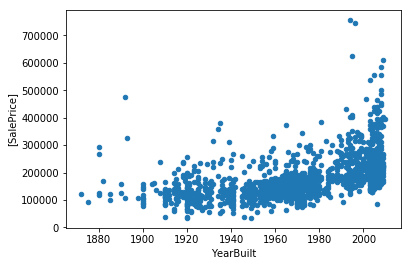

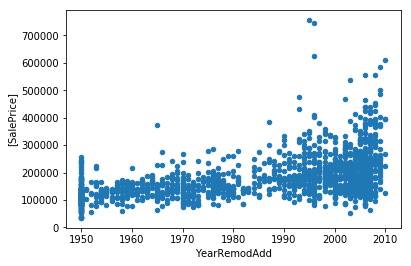

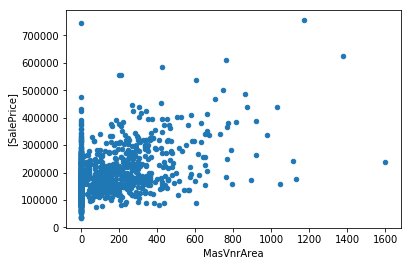

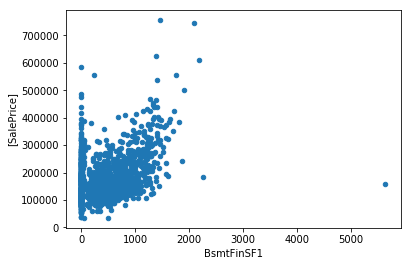

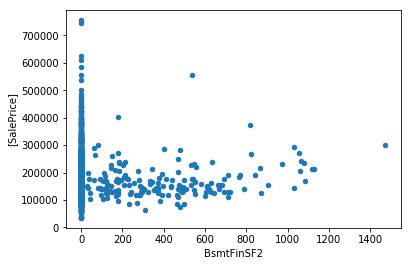

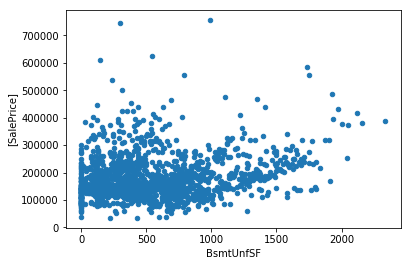

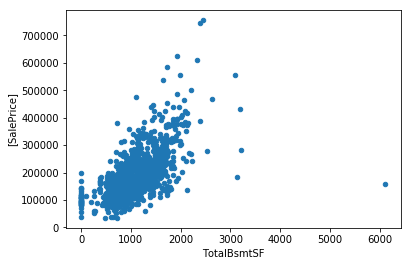

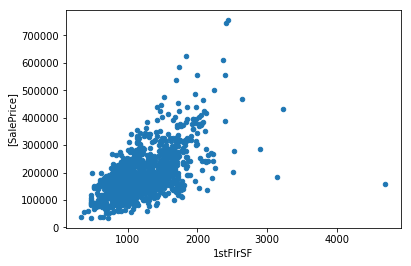

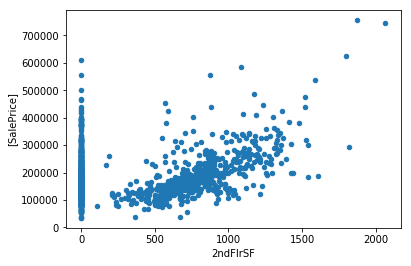

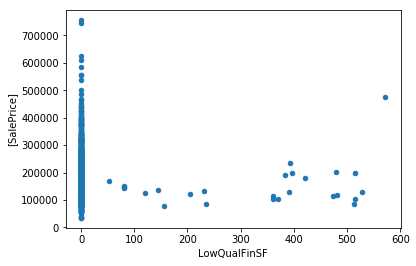

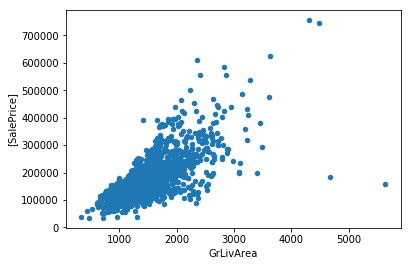

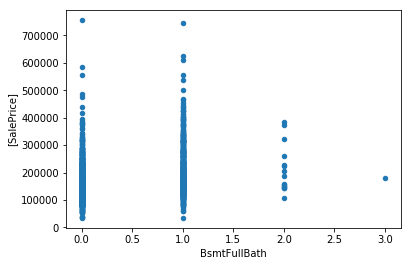

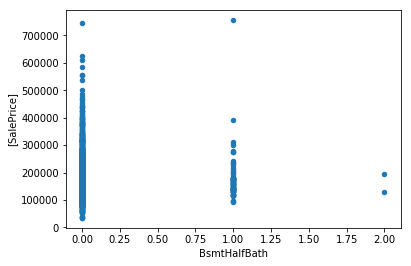

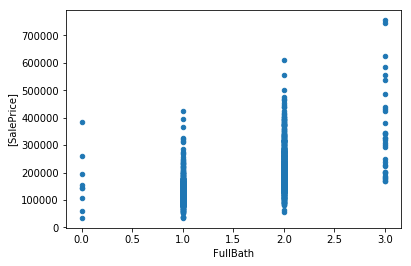

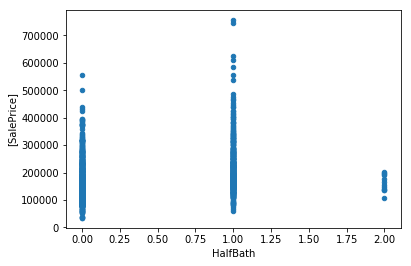

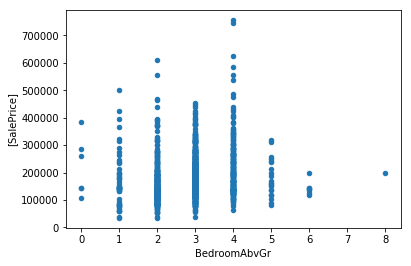

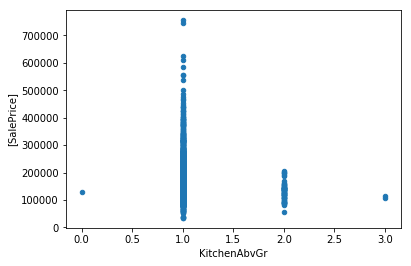

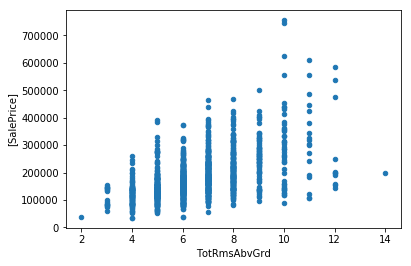

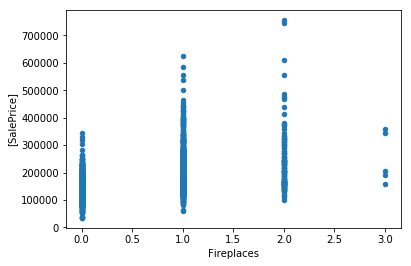

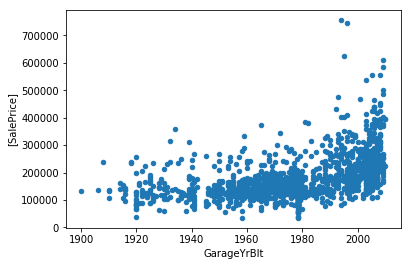

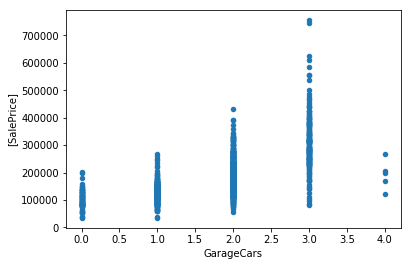

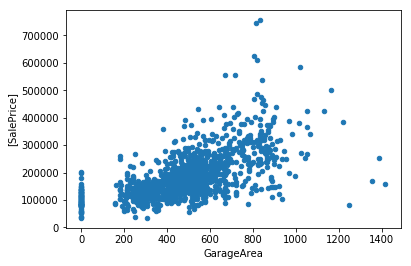

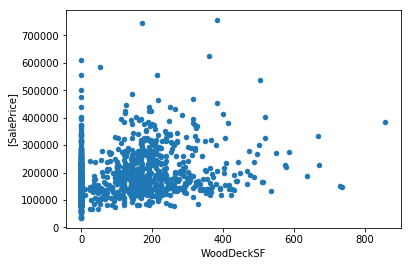

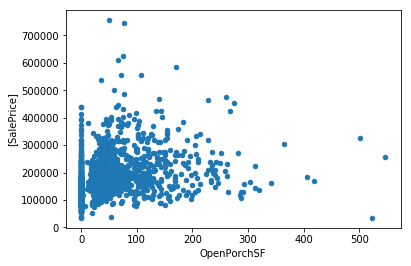

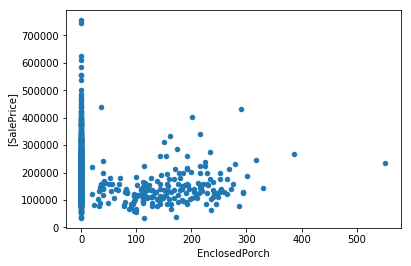

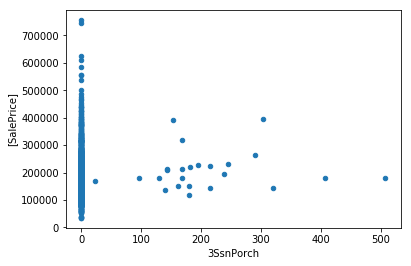

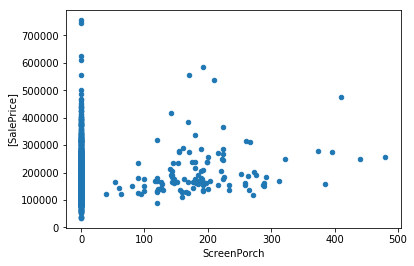

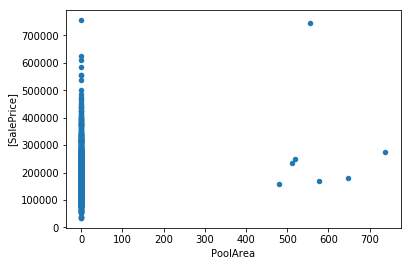

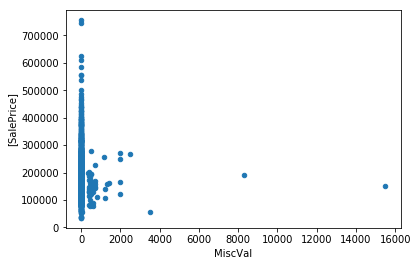

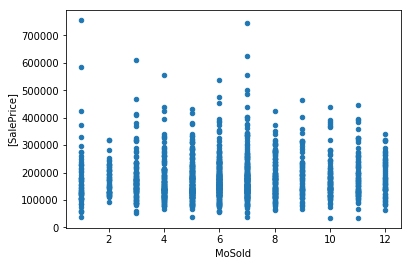

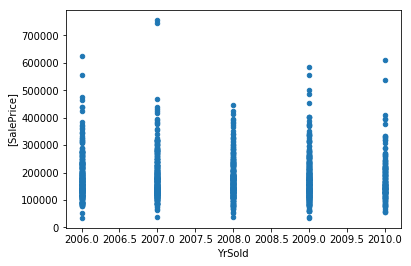

In [80]:

int_columns.loc[:,'SalePrice'] = train.loc[:,'SalePrice']
for c in int_columns.columns:
    if c != 'SalePrice':
        int_columns.plot.scatter(y=['SalePrice'], x=c)


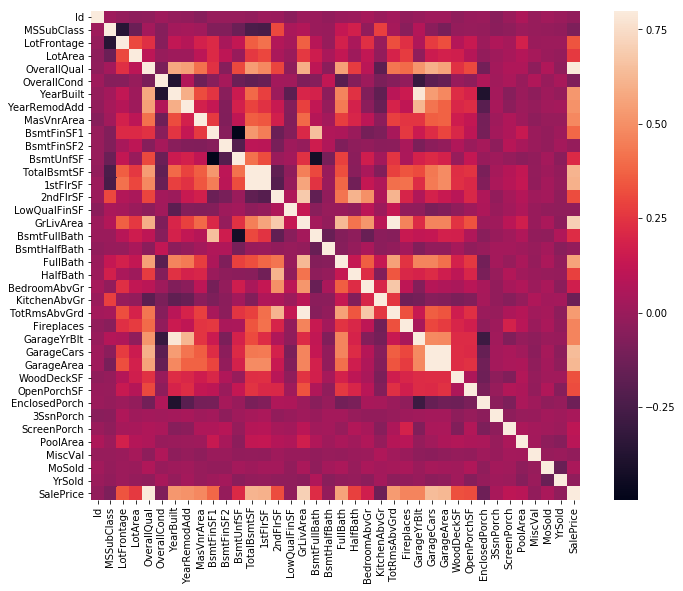

In [81]:
#correlation matrix
corrmat = int_columns.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);



In [82]:

strings = np.array([])
for c in object_columns.columns:
    strings = np.append(strings, pd.unique(object_columns[c].values))

print(len(strings))

labeler = LabelEncoder()
labeler.fit(strings)

for c in object_columns.columns:
    object_columns.loc[:,c] = labeler.transform(object_columns.loc[:,c])

object_columns[0:5]

268


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,134,127,112,141,89,12,87,78,41,116,...,17,132,156,156,174,112,112,112,166,117
1,134,127,112,141,89,12,54,78,164,59,...,17,132,156,156,174,112,112,112,166,117
2,134,127,112,83,89,12,87,78,41,116,...,17,132,156,156,174,112,112,112,166,117
3,134,127,112,83,89,12,47,78,48,116,...,50,163,156,156,174,112,112,112,166,10
4,134,127,112,83,89,12,54,78,113,116,...,17,132,156,156,174,112,112,112,166,117


In [96]:
# final dataset
train_ds = object_columns.join(int_columns)

train_ds.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,129.967123,126.794521,111.222603,119.788356,85.784932,12.069863,76.197945,79.834247,96.564384,110.389726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,18.062196,3.199807,6.906437,27.901737,13.461097,2.669462,17.394661,8.603914,41.154942,22.550366,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,32.000000,77.000000,77.000000,83.000000,23.000000,12.000000,47.000000,78.000000,21.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,134.000000,127.000000,112.000000,83.000000,89.000000,12.000000,54.000000,78.000000,52.000000,116.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,134.000000,127.000000,112.000000,141.000000,89.000000,12.000000,87.000000,78.000000,107.000000,116.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,134.000000,127.000000,112.000000,141.000000,89.000000,12.000000,87.000000,78.000000,119.000000,116.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,135.000000,127.000000,127.000000,141.000000,89.000000,114.000000,87.000000,149.000000,164.000000,139.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [129]:
# scaling features

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_ds.values)
train_ds_scaled = scaler.transform(train_ds.values)
X_train = (train_ds_scaled[:,:-1])
y_train = (train_ds_scaled[:,-1])

print(X_train)
print(y_train)

[[0.99029126 1.         0.7        ... 0.         0.09090909 0.5       ]
 [0.99029126 1.         0.7        ... 0.         0.36363636 0.25      ]
 [0.99029126 1.         0.7        ... 0.         0.72727273 0.5       ]
 ...
 [0.99029126 1.         0.7        ... 0.16129032 0.36363636 1.        ]
 [0.99029126 1.         0.7        ... 0.         0.27272727 1.        ]
 [0.99029126 1.         0.7        ... 0.         0.45454545 0.5       ]]
[0.24107763 0.20358284 0.26190807 ... 0.321622   0.14890293 0.15636717]


In [130]:
def nn_model(train):
    NN_model = Sequential()

    # The Input Layer :
    NN_model.add(Dense(128, input_dim = train.shape[1], activation='relu'))

    # The Hidden Layers :
    NN_model.add(Dense(256, activation='relu'))
    NN_model.add(Dropout(.5))
    NN_model.add(Dense(256, activation='relu'))

    # The Output Layer :
    NN_model.add(Dense(1, activation='linear') )

    # Compile the network :
    NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    NN_model.summary()
    return NN_model

model = nn_model(X_train)
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, verbose=2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               10368     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 257       
Total params: 109,441
Trainable params: 109,441
Non-trainable params: 0
_________________________________________________________________
Train on 1168 samples, validate on 292 samples
Epoch 1/200
 - 1s - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absol

KeyboardInterrupt: 

In [126]:
predict = model.predict(X_train)
print('RMSE on train set = %.6f' % math.sqrt(mean_squared_error(y_train* 1e06, predict* 1e06)))

# top: RMSE = 30155.097325
#  - 0s - loss: 17869.9908 - mean_absolute_error: 17869.9908 - val_loss: 22195.5058 - val_mean_absolute_error: 22195.5058


ValueError: Error when checking input: expected dense_17_input to have shape (81,) but got array with shape (1,)

In [ ]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])

In [ ]:
labels = np.array([])

test_predict = model.predict(test_scaled) * 1e06
test_predict = pd.DataFrame(test_predict)


In [ ]:

test_predict['Id'] = test.values[:,0]

test_predict.columns = ['SalePrice', 'Id']

test_predict.to_csv('submission.csv', index=False)
test_predict[0:10]

In [131]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [133]:
def train(dtrain, dtest, depth, rounds):
    # Train xgboost
    param = {'max_depth' : depth, 'silent': 1, 'eta' : 0.5, 'objective' : 'reg:linear', 'seed' : 42}
    num_round = rounds
    bst = xgb.train(param, dtrain, num_round, [(dtest, 'test'), (dtrain, 'train')])
    return bst

def check(bst):
    # make prediction
    train_pred = bst.predict(dtrain) * 1e06
    rmse_train = math.sqrt(mean_squared_error(y_tr[:], train_pred))
    test_pred = bst.predict(dtest) * 1e06
    rmse_test = math.sqrt(mean_squared_error(y_ts[:], test_pred))
    return rmse_train, rmse_test

result = []
for depth in range(2, 5):
    for rounds in range(10, 60, 2):
        dtrain = xgb.DMatrix(X_tr, y_tr)
        dtest = xgb.DMatrix(X_ts, y_ts)
        bst = train(dtrain, dtest, depth, rounds)
        rmse_train, rmse_test = check(bst)
        result.append([depth, rounds, rmse_train, rmse_test])



[0]	test-rmse:0.176031	train-rmse:0.167957
[1]	test-rmse:0.104863	train-rmse:0.098284
[2]	test-rmse:0.072828	train-rmse:0.066342
[3]	test-rmse:0.057135	train-rmse:0.051988
[4]	test-rmse:0.050771	train-rmse:0.045839
[5]	test-rmse:0.050488	train-rmse:0.042058
[6]	test-rmse:0.048196	train-rmse:0.040281
[7]	test-rmse:0.050792	train-rmse:0.038694
[8]	test-rmse:0.050191	train-rmse:0.037417
[9]	test-rmse:0.04852	train-rmse:0.036275
[0]	test-rmse:0.176031	train-rmse:0.167957
[1]	test-rmse:0.104863	train-rmse:0.098284
[2]	test-rmse:0.072828	train-rmse:0.066342
[3]	test-rmse:0.057135	train-rmse:0.051988
[4]	test-rmse:0.050771	train-rmse:0.045839
[5]	test-rmse:0.050488	train-rmse:0.042058
[6]	test-rmse:0.048196	train-rmse:0.040281
[7]	test-rmse:0.050792	train-rmse:0.038694
[8]	test-rmse:0.050191	train-rmse:0.037417
[9]	test-rmse:0.04852	train-rmse:0.036275
[10]	test-rmse:0.049948	train-rmse:0.035567
[11]	test-rmse:0.04964	train-rmse:0.034644
[0]	test-rmse:0.176031	train-rmse:0.167957
[1]	test-rms

[0]	test-rmse:0.176031	train-rmse:0.167957
[1]	test-rmse:0.104863	train-rmse:0.098284
[2]	test-rmse:0.072828	train-rmse:0.066342
[3]	test-rmse:0.057135	train-rmse:0.051988
[4]	test-rmse:0.050771	train-rmse:0.045839
[5]	test-rmse:0.050488	train-rmse:0.042058
[6]	test-rmse:0.048196	train-rmse:0.040281
[7]	test-rmse:0.050792	train-rmse:0.038694
[8]	test-rmse:0.050191	train-rmse:0.037417
[9]	test-rmse:0.04852	train-rmse:0.036275
[10]	test-rmse:0.049948	train-rmse:0.035567
[11]	test-rmse:0.04964	train-rmse:0.034644
[12]	test-rmse:0.048838	train-rmse:0.033967
[13]	test-rmse:0.048777	train-rmse:0.03339
[14]	test-rmse:0.048666	train-rmse:0.032768
[15]	test-rmse:0.048645	train-rmse:0.032153
[16]	test-rmse:0.048466	train-rmse:0.031776
[17]	test-rmse:0.048357	train-rmse:0.031426
[18]	test-rmse:0.049159	train-rmse:0.031097
[19]	test-rmse:0.04926	train-rmse:0.030519
[20]	test-rmse:0.049415	train-rmse:0.030112
[21]	test-rmse:0.049325	train-rmse:0.029793
[22]	test-rmse:0.049135	train-rmse:0.029565
[2

[19]	test-rmse:0.04926	train-rmse:0.030519
[20]	test-rmse:0.049415	train-rmse:0.030112
[21]	test-rmse:0.049325	train-rmse:0.029793
[22]	test-rmse:0.049135	train-rmse:0.029565
[23]	test-rmse:0.049023	train-rmse:0.02925
[24]	test-rmse:0.048804	train-rmse:0.028845
[25]	test-rmse:0.049492	train-rmse:0.028476
[26]	test-rmse:0.049496	train-rmse:0.02819
[27]	test-rmse:0.049072	train-rmse:0.027793
[28]	test-rmse:0.049045	train-rmse:0.02753
[29]	test-rmse:0.048814	train-rmse:0.02716
[30]	test-rmse:0.048472	train-rmse:0.026738
[31]	test-rmse:0.048344	train-rmse:0.026388
[32]	test-rmse:0.04822	train-rmse:0.026199
[33]	test-rmse:0.048223	train-rmse:0.025946
[34]	test-rmse:0.048425	train-rmse:0.025813
[35]	test-rmse:0.048681	train-rmse:0.025578
[36]	test-rmse:0.048502	train-rmse:0.02532
[37]	test-rmse:0.048398	train-rmse:0.025017
[38]	test-rmse:0.048078	train-rmse:0.024767
[39]	test-rmse:0.048393	train-rmse:0.024419
[0]	test-rmse:0.176031	train-rmse:0.167957
[1]	test-rmse:0.104863	train-rmse:0.0982

[36]	test-rmse:0.048502	train-rmse:0.02532
[37]	test-rmse:0.048398	train-rmse:0.025017
[38]	test-rmse:0.048078	train-rmse:0.024767
[39]	test-rmse:0.048393	train-rmse:0.024419
[40]	test-rmse:0.048433	train-rmse:0.024085
[41]	test-rmse:0.048266	train-rmse:0.023672
[42]	test-rmse:0.048281	train-rmse:0.023547
[43]	test-rmse:0.048208	train-rmse:0.023433
[44]	test-rmse:0.04799	train-rmse:0.023253
[45]	test-rmse:0.048062	train-rmse:0.023173
[46]	test-rmse:0.048178	train-rmse:0.023075
[47]	test-rmse:0.047953	train-rmse:0.022839
[0]	test-rmse:0.176031	train-rmse:0.167957
[1]	test-rmse:0.104863	train-rmse:0.098284
[2]	test-rmse:0.072828	train-rmse:0.066342
[3]	test-rmse:0.057135	train-rmse:0.051988
[4]	test-rmse:0.050771	train-rmse:0.045839
[5]	test-rmse:0.050488	train-rmse:0.042058
[6]	test-rmse:0.048196	train-rmse:0.040281
[7]	test-rmse:0.050792	train-rmse:0.038694
[8]	test-rmse:0.050191	train-rmse:0.037417
[9]	test-rmse:0.04852	train-rmse:0.036275
[10]	test-rmse:0.049948	train-rmse:0.035567
[

[20]	test-rmse:0.049415	train-rmse:0.030112
[21]	test-rmse:0.049325	train-rmse:0.029793
[22]	test-rmse:0.049135	train-rmse:0.029565
[23]	test-rmse:0.049023	train-rmse:0.02925
[24]	test-rmse:0.048804	train-rmse:0.028845
[25]	test-rmse:0.049492	train-rmse:0.028476
[26]	test-rmse:0.049496	train-rmse:0.02819
[27]	test-rmse:0.049072	train-rmse:0.027793
[28]	test-rmse:0.049045	train-rmse:0.02753
[29]	test-rmse:0.048814	train-rmse:0.02716
[30]	test-rmse:0.048472	train-rmse:0.026738
[31]	test-rmse:0.048344	train-rmse:0.026388
[32]	test-rmse:0.04822	train-rmse:0.026199
[33]	test-rmse:0.048223	train-rmse:0.025946
[34]	test-rmse:0.048425	train-rmse:0.025813
[35]	test-rmse:0.048681	train-rmse:0.025578
[36]	test-rmse:0.048502	train-rmse:0.02532
[37]	test-rmse:0.048398	train-rmse:0.025017
[38]	test-rmse:0.048078	train-rmse:0.024767
[39]	test-rmse:0.048393	train-rmse:0.024419
[40]	test-rmse:0.048433	train-rmse:0.024085
[41]	test-rmse:0.048266	train-rmse:0.023672
[42]	test-rmse:0.048281	train-rmse:0.0

[5]	test-rmse:0.047389	train-rmse:0.034759
[6]	test-rmse:0.046032	train-rmse:0.033092
[7]	test-rmse:0.043955	train-rmse:0.031338
[8]	test-rmse:0.043228	train-rmse:0.029993
[9]	test-rmse:0.042971	train-rmse:0.029289
[10]	test-rmse:0.042643	train-rmse:0.028252
[11]	test-rmse:0.042426	train-rmse:0.027659
[12]	test-rmse:0.042765	train-rmse:0.026912
[13]	test-rmse:0.042651	train-rmse:0.026495
[14]	test-rmse:0.042396	train-rmse:0.026073
[15]	test-rmse:0.042476	train-rmse:0.025431
[16]	test-rmse:0.043413	train-rmse:0.024805
[17]	test-rmse:0.043264	train-rmse:0.024241
[18]	test-rmse:0.043283	train-rmse:0.023733
[19]	test-rmse:0.043778	train-rmse:0.023465
[20]	test-rmse:0.043789	train-rmse:0.023023
[21]	test-rmse:0.043729	train-rmse:0.022625
[0]	test-rmse:0.172058	train-rmse:0.165506
[1]	test-rmse:0.098321	train-rmse:0.092744
[2]	test-rmse:0.067247	train-rmse:0.058912
[3]	test-rmse:0.053946	train-rmse:0.044346
[4]	test-rmse:0.048529	train-rmse:0.037939
[5]	test-rmse:0.047389	train-rmse:0.034759

[32]	test-rmse:0.04346	train-rmse:0.018777
[33]	test-rmse:0.0434	train-rmse:0.018375
[0]	test-rmse:0.172058	train-rmse:0.165506
[1]	test-rmse:0.098321	train-rmse:0.092744
[2]	test-rmse:0.067247	train-rmse:0.058912
[3]	test-rmse:0.053946	train-rmse:0.044346
[4]	test-rmse:0.048529	train-rmse:0.037939
[5]	test-rmse:0.047389	train-rmse:0.034759
[6]	test-rmse:0.046032	train-rmse:0.033092
[7]	test-rmse:0.043955	train-rmse:0.031338
[8]	test-rmse:0.043228	train-rmse:0.029993
[9]	test-rmse:0.042971	train-rmse:0.029289
[10]	test-rmse:0.042643	train-rmse:0.028252
[11]	test-rmse:0.042426	train-rmse:0.027659
[12]	test-rmse:0.042765	train-rmse:0.026912
[13]	test-rmse:0.042651	train-rmse:0.026495
[14]	test-rmse:0.042396	train-rmse:0.026073
[15]	test-rmse:0.042476	train-rmse:0.025431
[16]	test-rmse:0.043413	train-rmse:0.024805
[17]	test-rmse:0.043264	train-rmse:0.024241
[18]	test-rmse:0.043283	train-rmse:0.023733
[19]	test-rmse:0.043778	train-rmse:0.023465
[20]	test-rmse:0.043789	train-rmse:0.023023
[

[31]	test-rmse:0.043443	train-rmse:0.019113
[32]	test-rmse:0.04346	train-rmse:0.018777
[33]	test-rmse:0.0434	train-rmse:0.018375
[34]	test-rmse:0.043381	train-rmse:0.018051
[35]	test-rmse:0.043394	train-rmse:0.017933
[36]	test-rmse:0.043373	train-rmse:0.017775
[37]	test-rmse:0.043411	train-rmse:0.017339
[38]	test-rmse:0.043584	train-rmse:0.017249
[39]	test-rmse:0.043685	train-rmse:0.016963
[40]	test-rmse:0.04348	train-rmse:0.016651
[41]	test-rmse:0.043399	train-rmse:0.016517
[42]	test-rmse:0.043387	train-rmse:0.016451
[43]	test-rmse:0.043348	train-rmse:0.016212
[0]	test-rmse:0.172058	train-rmse:0.165506
[1]	test-rmse:0.098321	train-rmse:0.092744
[2]	test-rmse:0.067247	train-rmse:0.058912
[3]	test-rmse:0.053946	train-rmse:0.044346
[4]	test-rmse:0.048529	train-rmse:0.037939
[5]	test-rmse:0.047389	train-rmse:0.034759
[6]	test-rmse:0.046032	train-rmse:0.033092
[7]	test-rmse:0.043955	train-rmse:0.031338
[8]	test-rmse:0.043228	train-rmse:0.029993
[9]	test-rmse:0.042971	train-rmse:0.029289
[1

[31]	test-rmse:0.043443	train-rmse:0.019113
[32]	test-rmse:0.04346	train-rmse:0.018777
[33]	test-rmse:0.0434	train-rmse:0.018375
[34]	test-rmse:0.043381	train-rmse:0.018051
[35]	test-rmse:0.043394	train-rmse:0.017933
[36]	test-rmse:0.043373	train-rmse:0.017775
[37]	test-rmse:0.043411	train-rmse:0.017339
[38]	test-rmse:0.043584	train-rmse:0.017249
[39]	test-rmse:0.043685	train-rmse:0.016963
[40]	test-rmse:0.04348	train-rmse:0.016651
[41]	test-rmse:0.043399	train-rmse:0.016517
[42]	test-rmse:0.043387	train-rmse:0.016451
[43]	test-rmse:0.043348	train-rmse:0.016212
[44]	test-rmse:0.043309	train-rmse:0.015981
[45]	test-rmse:0.04333	train-rmse:0.015591
[46]	test-rmse:0.043233	train-rmse:0.015459
[47]	test-rmse:0.043268	train-rmse:0.015261
[48]	test-rmse:0.043199	train-rmse:0.015089
[49]	test-rmse:0.043216	train-rmse:0.014909
[50]	test-rmse:0.043211	train-rmse:0.014859
[51]	test-rmse:0.043176	train-rmse:0.014628
[0]	test-rmse:0.172058	train-rmse:0.165506
[1]	test-rmse:0.098321	train-rmse:0.09

[57]	test-rmse:0.043169	train-rmse:0.013616
[0]	test-rmse:0.1705	train-rmse:0.164073
[1]	test-rmse:0.095887	train-rmse:0.089528
[2]	test-rmse:0.061936	train-rmse:0.05356
[3]	test-rmse:0.047582	train-rmse:0.038199
[4]	test-rmse:0.040967	train-rmse:0.031079
[5]	test-rmse:0.040741	train-rmse:0.027435
[6]	test-rmse:0.039199	train-rmse:0.025373
[7]	test-rmse:0.038788	train-rmse:0.024065
[8]	test-rmse:0.038543	train-rmse:0.023475
[9]	test-rmse:0.038176	train-rmse:0.02247
[0]	test-rmse:0.1705	train-rmse:0.164073
[1]	test-rmse:0.095887	train-rmse:0.089528
[2]	test-rmse:0.061936	train-rmse:0.05356
[3]	test-rmse:0.047582	train-rmse:0.038199
[4]	test-rmse:0.040967	train-rmse:0.031079
[5]	test-rmse:0.040741	train-rmse:0.027435
[6]	test-rmse:0.039199	train-rmse:0.025373
[7]	test-rmse:0.038788	train-rmse:0.024065
[8]	test-rmse:0.038543	train-rmse:0.023475
[9]	test-rmse:0.038176	train-rmse:0.02247
[10]	test-rmse:0.037842	train-rmse:0.021555
[11]	test-rmse:0.037975	train-rmse:0.020708
[0]	test-rmse:0.

[0]	test-rmse:0.1705	train-rmse:0.164073
[1]	test-rmse:0.095887	train-rmse:0.089528
[2]	test-rmse:0.061936	train-rmse:0.05356
[3]	test-rmse:0.047582	train-rmse:0.038199
[4]	test-rmse:0.040967	train-rmse:0.031079
[5]	test-rmse:0.040741	train-rmse:0.027435
[6]	test-rmse:0.039199	train-rmse:0.025373
[7]	test-rmse:0.038788	train-rmse:0.024065
[8]	test-rmse:0.038543	train-rmse:0.023475
[9]	test-rmse:0.038176	train-rmse:0.02247
[10]	test-rmse:0.037842	train-rmse:0.021555
[11]	test-rmse:0.037975	train-rmse:0.020708
[12]	test-rmse:0.037773	train-rmse:0.020161
[13]	test-rmse:0.037637	train-rmse:0.01977
[14]	test-rmse:0.03778	train-rmse:0.019511
[15]	test-rmse:0.037889	train-rmse:0.018891
[16]	test-rmse:0.03793	train-rmse:0.01856
[17]	test-rmse:0.038387	train-rmse:0.018221
[18]	test-rmse:0.038253	train-rmse:0.017629
[19]	test-rmse:0.038101	train-rmse:0.017002
[20]	test-rmse:0.038015	train-rmse:0.01668
[21]	test-rmse:0.037992	train-rmse:0.016047
[22]	test-rmse:0.038085	train-rmse:0.015548
[23]	te

[19]	test-rmse:0.038101	train-rmse:0.017002
[20]	test-rmse:0.038015	train-rmse:0.01668
[21]	test-rmse:0.037992	train-rmse:0.016047
[22]	test-rmse:0.038085	train-rmse:0.015548
[23]	test-rmse:0.038305	train-rmse:0.015157
[24]	test-rmse:0.038297	train-rmse:0.014788
[25]	test-rmse:0.03842	train-rmse:0.01452
[26]	test-rmse:0.038655	train-rmse:0.014312
[27]	test-rmse:0.038517	train-rmse:0.013835
[28]	test-rmse:0.038683	train-rmse:0.013572
[29]	test-rmse:0.038628	train-rmse:0.013238
[30]	test-rmse:0.038547	train-rmse:0.013051
[31]	test-rmse:0.038631	train-rmse:0.012749
[32]	test-rmse:0.038571	train-rmse:0.012502
[33]	test-rmse:0.038595	train-rmse:0.012234
[34]	test-rmse:0.038677	train-rmse:0.012085
[35]	test-rmse:0.038641	train-rmse:0.011764
[36]	test-rmse:0.038598	train-rmse:0.011476
[37]	test-rmse:0.038536	train-rmse:0.011083
[38]	test-rmse:0.038436	train-rmse:0.010786
[39]	test-rmse:0.03842	train-rmse:0.010623
[0]	test-rmse:0.1705	train-rmse:0.164073
[1]	test-rmse:0.095887	train-rmse:0.089

[36]	test-rmse:0.038598	train-rmse:0.011476
[37]	test-rmse:0.038536	train-rmse:0.011083
[38]	test-rmse:0.038436	train-rmse:0.010786
[39]	test-rmse:0.03842	train-rmse:0.010623
[40]	test-rmse:0.038466	train-rmse:0.010457
[41]	test-rmse:0.0385	train-rmse:0.010299
[42]	test-rmse:0.038544	train-rmse:0.010012
[43]	test-rmse:0.038535	train-rmse:0.009956
[44]	test-rmse:0.038412	train-rmse:0.009583
[45]	test-rmse:0.038344	train-rmse:0.009445
[46]	test-rmse:0.038293	train-rmse:0.009144
[47]	test-rmse:0.038155	train-rmse:0.008964
[0]	test-rmse:0.1705	train-rmse:0.164073
[1]	test-rmse:0.095887	train-rmse:0.089528
[2]	test-rmse:0.061936	train-rmse:0.05356
[3]	test-rmse:0.047582	train-rmse:0.038199
[4]	test-rmse:0.040967	train-rmse:0.031079
[5]	test-rmse:0.040741	train-rmse:0.027435
[6]	test-rmse:0.039199	train-rmse:0.025373
[7]	test-rmse:0.038788	train-rmse:0.024065
[8]	test-rmse:0.038543	train-rmse:0.023475
[9]	test-rmse:0.038176	train-rmse:0.02247
[10]	test-rmse:0.037842	train-rmse:0.021555
[11]	

[21]	test-rmse:0.037992	train-rmse:0.016047
[22]	test-rmse:0.038085	train-rmse:0.015548
[23]	test-rmse:0.038305	train-rmse:0.015157
[24]	test-rmse:0.038297	train-rmse:0.014788
[25]	test-rmse:0.03842	train-rmse:0.01452
[26]	test-rmse:0.038655	train-rmse:0.014312
[27]	test-rmse:0.038517	train-rmse:0.013835
[28]	test-rmse:0.038683	train-rmse:0.013572
[29]	test-rmse:0.038628	train-rmse:0.013238
[30]	test-rmse:0.038547	train-rmse:0.013051
[31]	test-rmse:0.038631	train-rmse:0.012749
[32]	test-rmse:0.038571	train-rmse:0.012502
[33]	test-rmse:0.038595	train-rmse:0.012234
[34]	test-rmse:0.038677	train-rmse:0.012085
[35]	test-rmse:0.038641	train-rmse:0.011764
[36]	test-rmse:0.038598	train-rmse:0.011476
[37]	test-rmse:0.038536	train-rmse:0.011083
[38]	test-rmse:0.038436	train-rmse:0.010786
[39]	test-rmse:0.03842	train-rmse:0.010623
[40]	test-rmse:0.038466	train-rmse:0.010457
[41]	test-rmse:0.0385	train-rmse:0.010299
[42]	test-rmse:0.038544	train-rmse:0.010012
[43]	test-rmse:0.038535	train-rmse:0.

In [134]:
# check results
result = pd.DataFrame(result, columns=['depth', 'rounds', 'rmse_train', 'rmse_test'])
result.describe()


,depth,rounds,rmse_train,rmse_test
count,75.000000,75.000000,75.000000,75.000000
mean,3.000000,34.000000,228860.344864,226326.710248
std,0.821995,14.519325,733.971093,1027.138673
min,2.000000,10.000000,226047.608740,223806.783938
25%,2.000000,22.000000,228530.141571,225489.085556
50%,3.000000,34.000000,228968.672037,226492.312308
75%,4.000000,46.000000,229378.219131,227056.677295
max,4.000000,58.000000,229758.379684,228098.559282


In [135]:
print(result[30:50])


    depth  rounds     rmse_train      rmse_test
30      3      20  228763.080704  224707.247823
31      3      22  228846.974529  224822.493120
32      3      24  228827.204805  224964.072087
33      3      26  228816.411495  225088.778973
34      3      28  228968.672037  225048.867226
35      3      30  229086.969388  225490.377842
36      3      32  229090.477345  225458.840794
37      3      34  229135.545995  225423.182259
38      3      36  229150.962223  225624.949528
39      3      38  229263.162593  225545.311110
40      3      40  229213.097853  225427.581898
41      3      42  229302.090562  225361.188825
42      3      44  229253.179316  225531.526505
43      3      46  229286.052321  225512.440053
44      3      48  229307.829383  225487.793270
45      3      50  229433.559200  225771.784410
46      3      52  229366.634959  225659.009354
47      3      54  229376.738109  225952.432909
48      3      56  229427.484583  226331.172292
49      3      58  229463.337657  226822

In [136]:
labels = np.array([])

dtrain = xgb.DMatrix(X_train, y_train)
param = {'max_depth' : 3, 'silent': 1, 'eta' : 0.5, 'objective' : 'reg:linear', 'seed' : 42}
bst = xgb.train(param, dtrain, 50, [(dtrain, 'train')])

dsubm = xgb.DMatrix(test_scaled)
subm_predict = bst.predict(dsubm) * 1e06
dsubm_predict = pd.DataFrame(subm_predict)

dsubm_predict['Id'] = test.values[:,0]
dsubm_predict.columns = ['SalePrice', 'Id']

dsubm_predict.to_csv('submission.csv', index=False)
dsubm_predict[0:10]

[0]	train-rmse:0.166289
[1]	train-rmse:0.093229
[2]	train-rmse:0.059343
[3]	train-rmse:0.044433
[4]	train-rmse:0.037965
[5]	train-rmse:0.035265
[6]	train-rmse:0.033509
[7]	train-rmse:0.032153
[8]	train-rmse:0.03125
[9]	train-rmse:0.030304
[10]	train-rmse:0.029891
[11]	train-rmse:0.029093
[12]	train-rmse:0.028326
[13]	train-rmse:0.027727
[14]	train-rmse:0.027295
[15]	train-rmse:0.026846
[16]	train-rmse:0.026268
[17]	train-rmse:0.025601
[18]	train-rmse:0.025147
[19]	train-rmse:0.024822
[20]	train-rmse:0.02436
[21]	train-rmse:0.023896
[22]	train-rmse:0.0235
[23]	train-rmse:0.023133
[24]	train-rmse:0.022594
[25]	train-rmse:0.022297
[26]	train-rmse:0.021892
[27]	train-rmse:0.021608
[28]	train-rmse:0.021236
[29]	train-rmse:0.020965
[30]	train-rmse:0.020684
[31]	train-rmse:0.020482
[32]	train-rmse:0.020108
[33]	train-rmse:0.019899
[34]	train-rmse:0.019628
[35]	train-rmse:0.019486
[36]	train-rmse:0.01923
[37]	train-rmse:0.018948
[38]	train-rmse:0.018677
[39]	train-rmse:0.018425
[40]	train-rmse

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80']
training data did not have the following fields: f80